# transfer leraning with vgg 16

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings("ignore")

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path ="C:/Users/harka/Desktop/books/Brain Tumor Images Dataset/training_set/"
valid_path = "C:/Users/harka/Desktop/books/Brain Tumor Images Dataset/validation_set/"

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False



58892288/58889256 [==============================] - 573s 10us/step


In [3]:
 # useful for getting number of classes
folders = glob('C:/Users/harka\Documents/project/Brain Tumor Images Dataset/TEST/*')

In [4]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='sigmoid')(x)

In [5]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [6]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 140 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [8]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
5/5 [==============================] - 26s 5s/step - loss: 0.8894 - accuracy: 0.5286 - val_loss: 0.6931 - val_accuracy: 0.3500
Epoch 2/5
5/5 [==============================] - 24s 5s/step - loss: 0.6921 - accuracy: 0.6857 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 24s 5s/step - loss: 0.6926 - accuracy: 0.5071 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
5/5 [==============================] - 24s 5s/step - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/5
5/5 [==============================] - 25s 5s/step - loss: 0.6918 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000


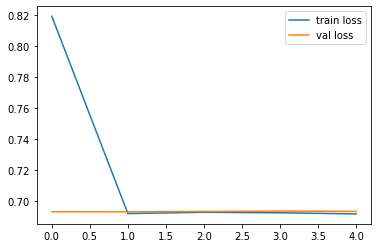

<Figure size 432x288 with 0 Axes>

In [9]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
import tensorflow as tf
from keras.models import load_model
model.save('braintumor_new_model.h5')

# RENET50

In [16]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [17]:
import warnings
warnings.filterwarnings("ignore")

# re-size all the images to this
IMAGE_SIZE = [224, 224]



train_path ="C:/Users/harka/Desktop/books/Brain Tumor Images Dataset/training_set/"
valid_path = "C:/Users/harka/Desktop/books/Brain Tumor Images Dataset/validation_set/"


# add preprocessing layer to the front of VGG
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False


94658560/94653016 [==============================] - 129s 1us/step


In [18]:
 # useful for getting number of classes
folders = glob('C:/Users/harka\Documents/project/Brain Tumor Images Dataset/TEST/*')

In [19]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='sigmoid')(x)

In [20]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [21]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 140 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [23]:
# fit the model
model1=model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
5/5 [==============================] - 36s 7s/step - loss: 0.7789 - accuracy: 0.7286 - val_loss: 0.6778 - val_accuracy: 0.6250
Epoch 2/5
5/5 [==============================] - 35s 7s/step - loss: 0.2990 - accuracy: 0.8429 - val_loss: 2.2024 - val_accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 35s 7s/step - loss: 0.5636 - accuracy: 0.8571 - val_loss: 0.9935 - val_accuracy: 0.5000
Epoch 4/5
5/5 [==============================] - 35s 7s/step - loss: 0.3262 - accuracy: 0.9286 - val_loss: 0.7206 - val_accuracy: 0.5000
Epoch 5/5
5/5 [==============================] - 35s 7s/step - loss: 0.3638 - accuracy: 0.8786 - val_loss: 0.4691 - val_accuracy: 0.7000


In [24]:
model1.history['val_loss']

[0.677849292755127,
 2.202409505844116,
 0.9935480356216431,
 0.7205709218978882,
 0.46909332275390625]

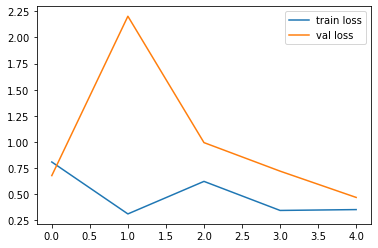

<Figure size 432x288 with 0 Axes>

In [26]:
# loss
plt.plot(model1.history['loss'], label='train loss')
plt.plot(model1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

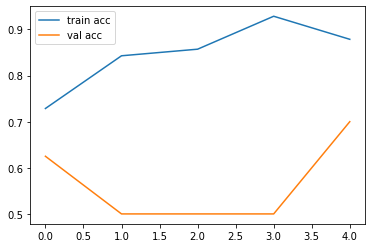

<Figure size 432x288 with 0 Axes>

In [30]:
# accuracies
plt.plot(model1.history['accuracy'], label='train acc')
plt.plot(model1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Fine-tune InceptionV3 on a new set of classes

In [31]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [32]:
import warnings
warnings.filterwarnings("ignore")

# re-size all the images to this
IMAGE_SIZE = [224, 224]


train_path ="C:/Users/harka/Desktop/books/Brain Tumor Images Dataset/training_set/"
valid_path = "C:/Users/harka/Desktop/books/Brain Tumor Images Dataset/validation_set/"

# add preprocessing layer to the front of VGG
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in inception.layers:
    layer.trainable = False

In [33]:
 # useful for getting number of classes
folders = glob('C:/Users/harka\Documents/project/Brain Tumor Images Dataset/TEST/*')

In [34]:
# our layers - you can add more if you want
x = Flatten()(inception.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(1, activation='softmax')(x)

In [35]:
model = Model(inputs=inception.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [36]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [37]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 140 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [38]:
# fit the model
model2 = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
5/5 [==============================] - 22s 4s/step - loss: 7.4004 - accuracy: 0.5000 - val_loss: 5.7500 - val_accuracy: 0.5000
Epoch 2/5
5/5 [==============================] - 22s 4s/step - loss: 7.7997 - accuracy: 0.5000 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 21s 4s/step - loss: 7.5335 - accuracy: 0.5000 - val_loss: 13.4166 - val_accuracy: 0.5000
Epoch 4/5
5/5 [==============================] - 23s 5s/step - loss: 7.9328 - accuracy: 0.5000 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 5/5
5/5 [==============================] - 22s 4s/step - loss: 7.7997 - accuracy: 0.5000 - val_loss: 9.5833 - val_accuracy: 0.5000


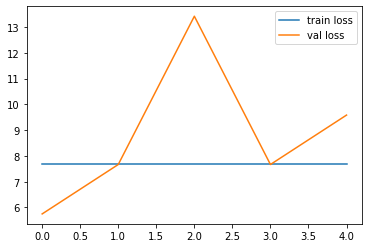

<Figure size 432x288 with 0 Axes>

In [39]:
# loss
plt.plot(model2.history['loss'], label='train loss')
plt.plot(model2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

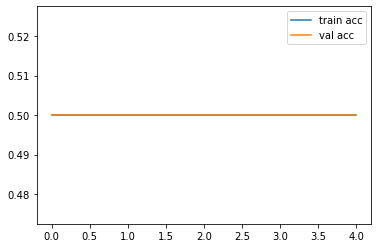

<Figure size 432x288 with 0 Axes>

In [43]:
# accuracies
plt.plot(model2.history['accuracy'], label='train acc')
plt.plot(model2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Extract features with MobileNetV2


In [57]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [58]:
import warnings
warnings.filterwarnings("ignore")

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path ="C:/Users/harka/Desktop/books/Brain Tumor Images Dataset/training_set/"
valid_path = "C:/Users/harka/Desktop/books/Brain Tumor Images Dataset/validation_set/"


# add preprocessing layer to the front of VGG
mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in mobilenet.layers:
    layer.trainable = False

In [59]:
# our layers - you can add more if you want
x = Flatten()(mobilenet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(1, activation='softmax')(x)

In [60]:
model = Model(inputs=mobilenet.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [61]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [62]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 140 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [63]:
# fit the model
model3 = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
5/5 [==============================] - 17s 3s/step - loss: 8.1990 - accuracy: 0.5000 - val_loss: 9.5833 - val_accuracy: 0.5000
Epoch 2/5
5/5 [==============================] - 18s 4s/step - loss: 7.6666 - accuracy: 0.5000 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 19s 4s/step - loss: 7.6666 - accuracy: 0.5000 - val_loss: 5.7500 - val_accuracy: 0.5000
Epoch 4/5
5/5 [==============================] - 17s 3s/step - loss: 8.1990 - accuracy: 0.5000 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 5/5
5/5 [==============================] - 16s 3s/step - loss: 8.1990 - accuracy: 0.5000 - val_loss: 13.4166 - val_accuracy: 0.5000


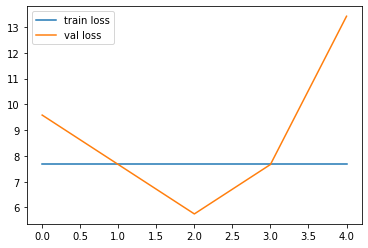

<Figure size 432x288 with 0 Axes>

In [64]:
# loss
plt.plot(model3.history['loss'], label='train loss')
plt.plot(model3.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

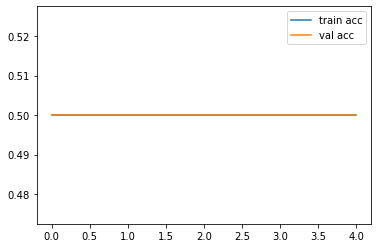

<Figure size 432x288 with 0 Axes>

In [67]:
# accuracies
plt.plot(model3.history['accuracy'], label='train acc')
plt.plot(model3.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')